In [1]:
#Import All the Libraries that are need to excute the code 

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import HistGradientBoostingClassifier


from tiingo import TiingoClient


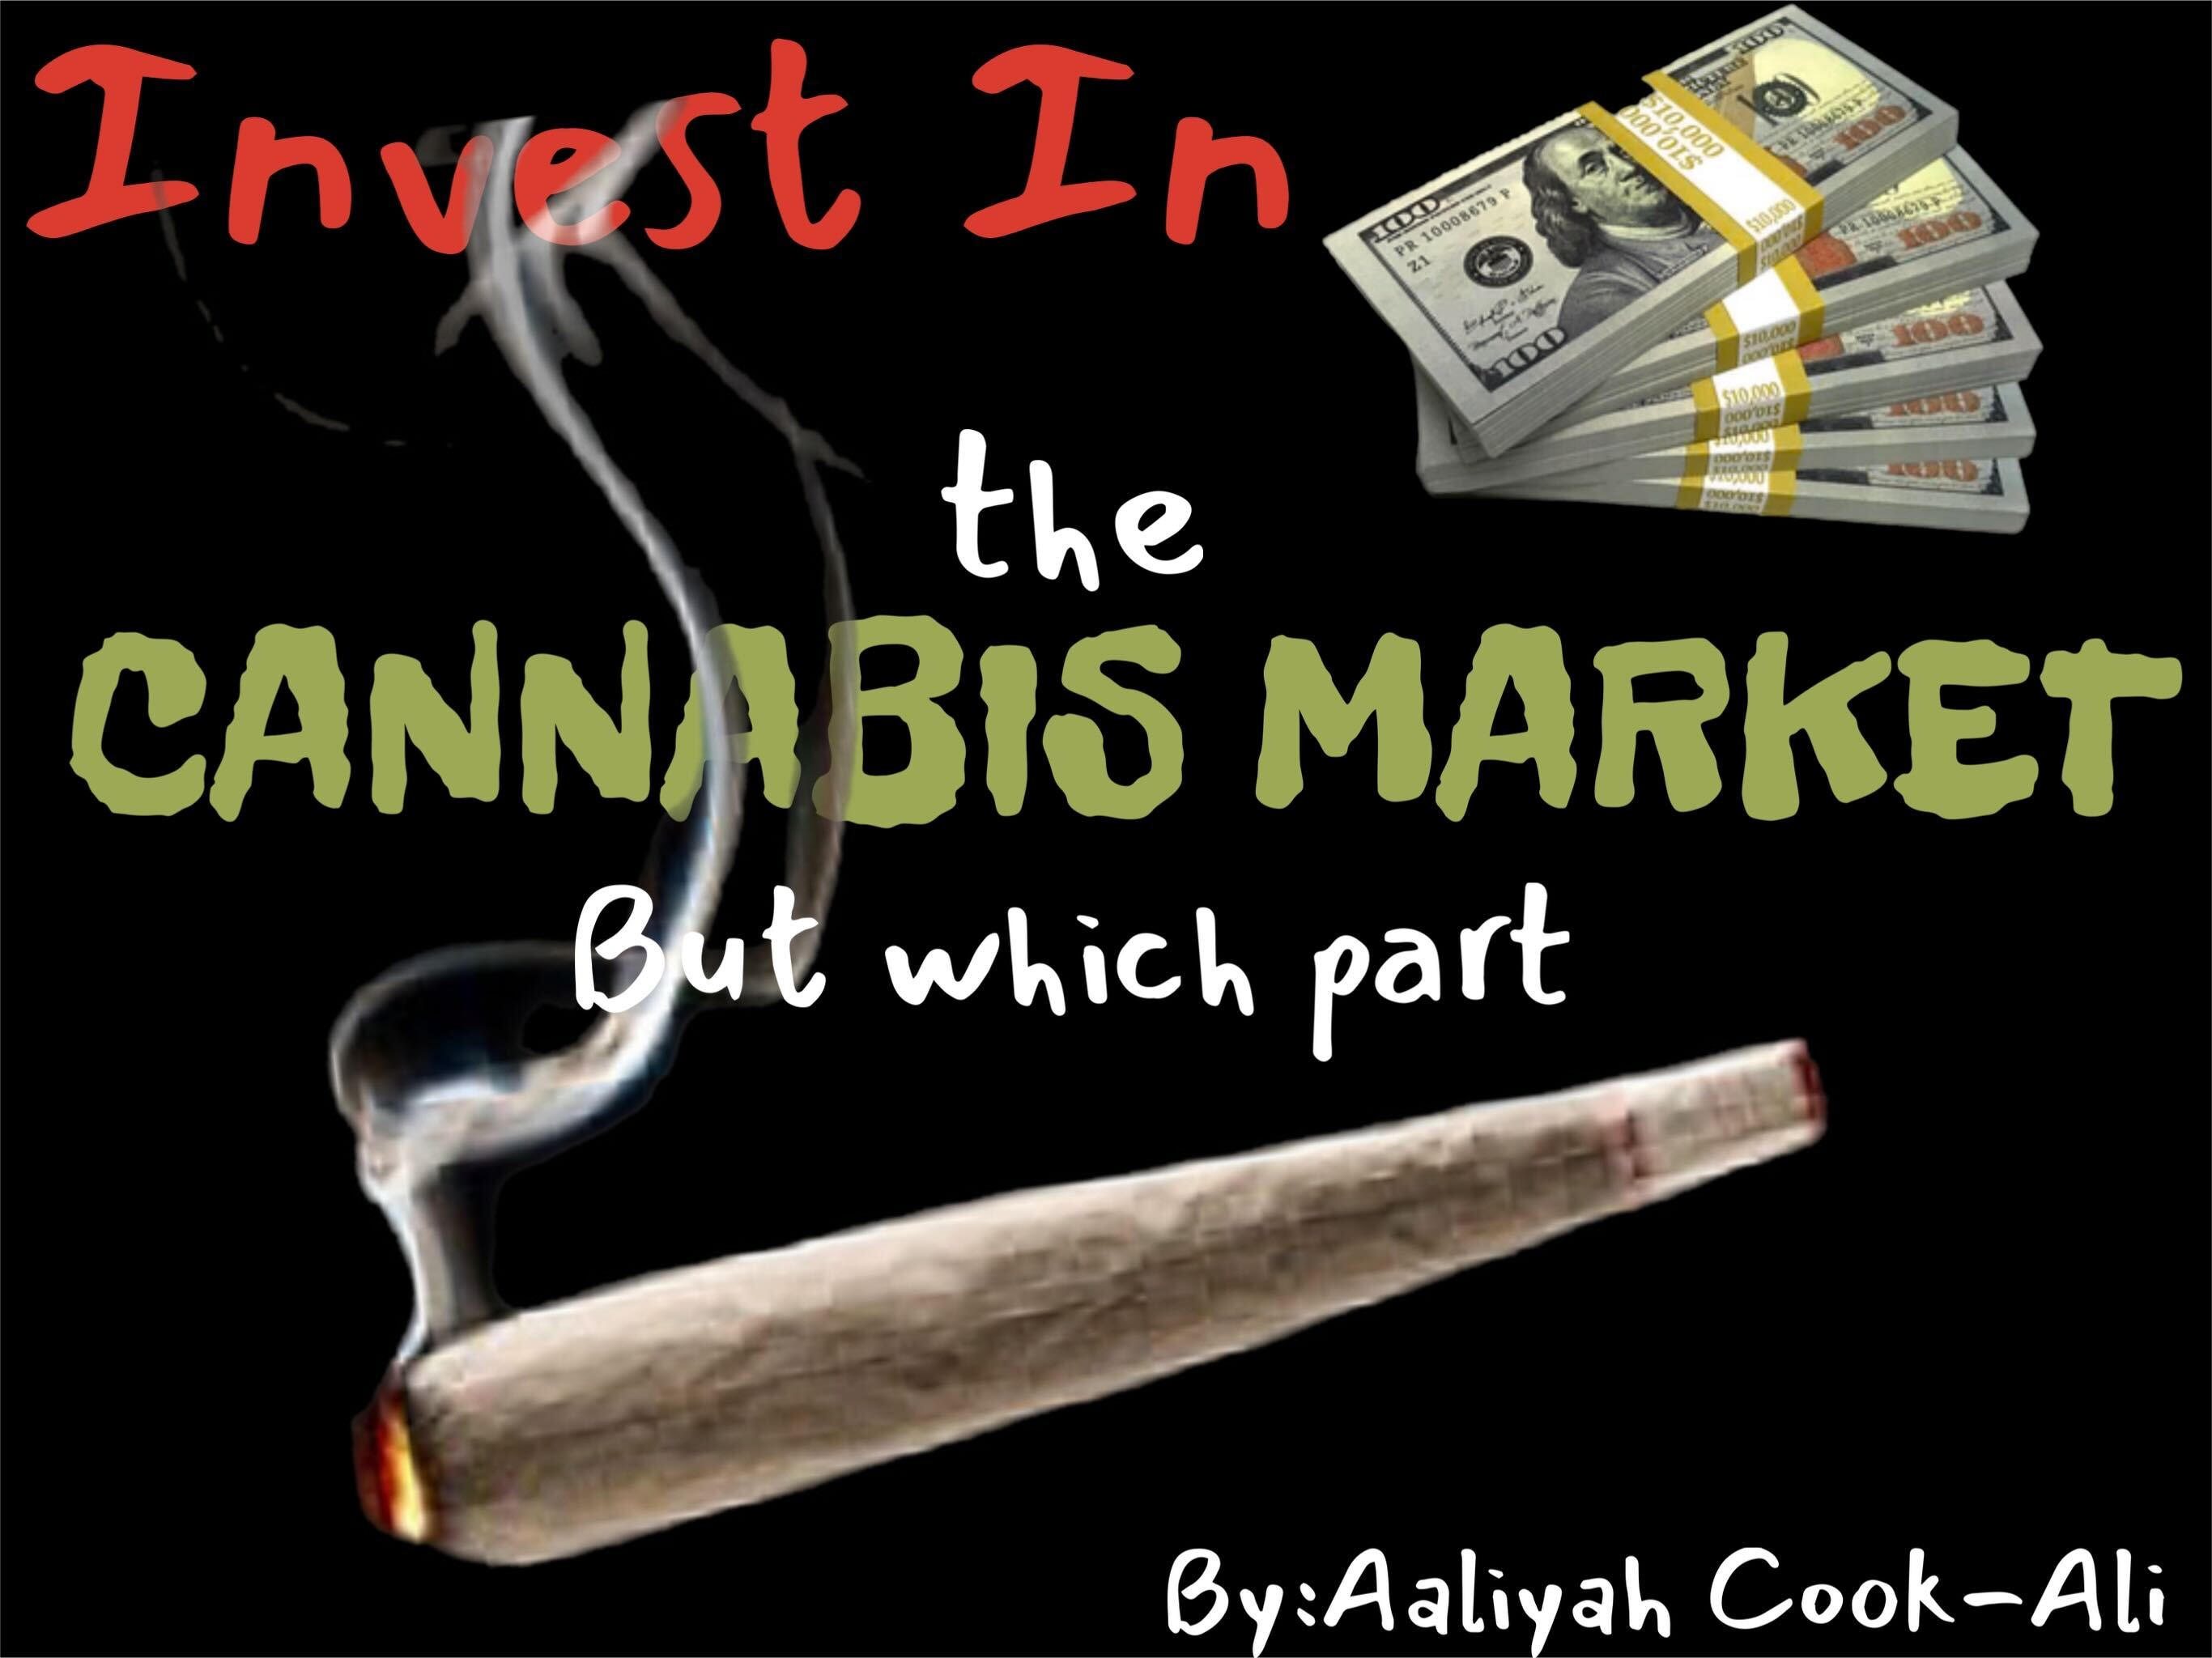

In [2]:
from IPython.display import Image
Image(filename='IMG_1341.jpg', width=900, height=800)


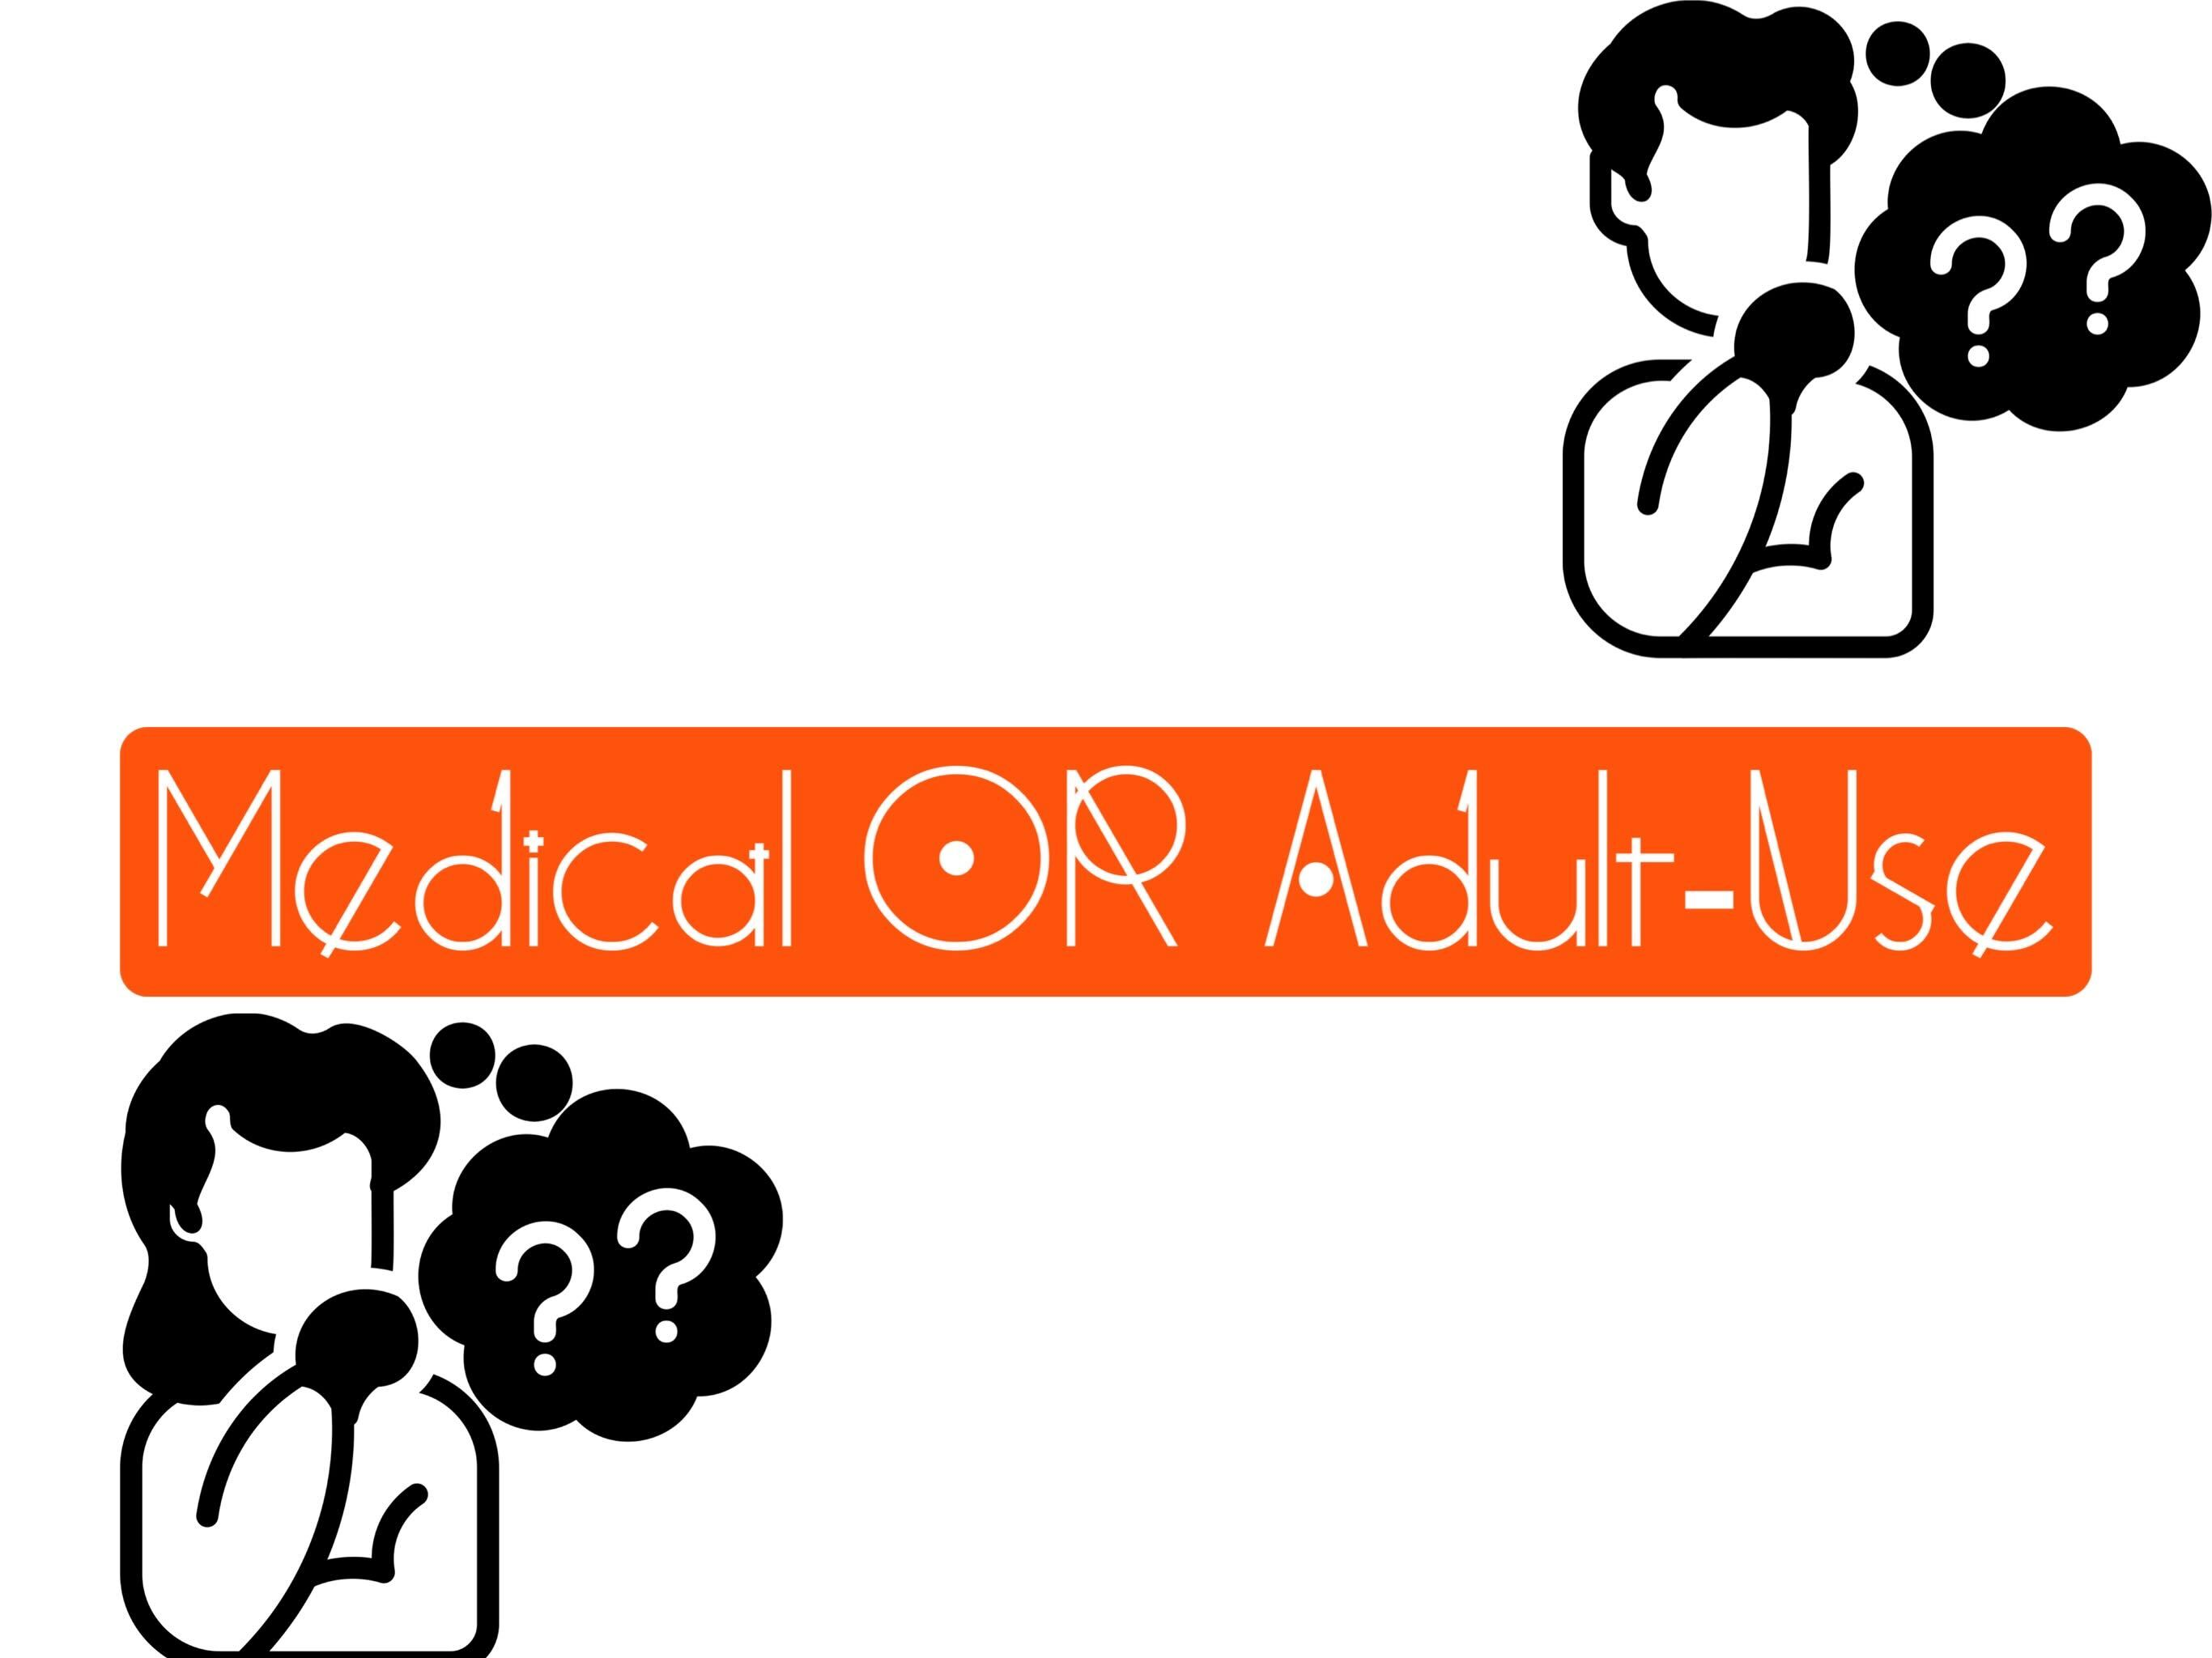

In [3]:
from IPython.display import Image
Image(filename='IMG_1338.jpg', width=900, height=800)


Cleaning the DataFrame

In [4]:
# read in the CSV File collected from Data.Gov 
csv_path = Path('Cannabis_Retail_Products_Sold_by_Product_Type-Copy1.csv')
cannabis_df = pd.read_csv('Cannabis_Retail_Products_Sold_by_Product_Type-Copy1.csv')
cannabis_df.head()


Month Ending              Product Type  Retail Sales Amount     Market
0  January 2023  Usable Cannabis (Flower)           2819150.84  Adult-Use
1  January 2023            Vape Cartridge            721223.06  Adult-Use
2  January 2023            Infused Edible            688928.99  Adult-Use
3  January 2023    Extract for Inhalation            868829.67  Adult-Use
4  January 2023  Usable Cannabis (Flower)           4343508.44    Medical

In [5]:
#identifying the DatFrame data types
cannabis_df.dtypes

Month Ending            object
Product Type            object
Retail Sales Amount    float64
Market                  object
dtype: object

In [6]:
#Assessing the data quality by identifying. the number of rows
cannabis_df.count()

Month Ending           117
Product Type           117
Retail Sales Amount    117
Market                 117
dtype: int64

In [7]:
#check the DataFrame for nulls
cannabis_df.isnull()

Month Ending  Product Type  Retail Sales Amount  Market
0           False         False                False   False
1           False         False                False   False
2           False         False                False   False
3           False         False                False   False
4           False         False                False   False
..            ...           ...                  ...     ...
112         False         False                False   False
113         False         False                False   False
114         False         False                False   False
115         False         False                False   False
116         False         False                False   False

[117 rows x 4 columns]

In [8]:
#checking to see how many nulls are in the DataFrame
cannabis_df.isnull().sum()

Month Ending           0
Product Type           0
Retail Sales Amount    0
Market                 0
dtype: int64

In [9]:
cannabis_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
112    False
113    False
114    False
115    False
116    False
Length: 117, dtype: bool

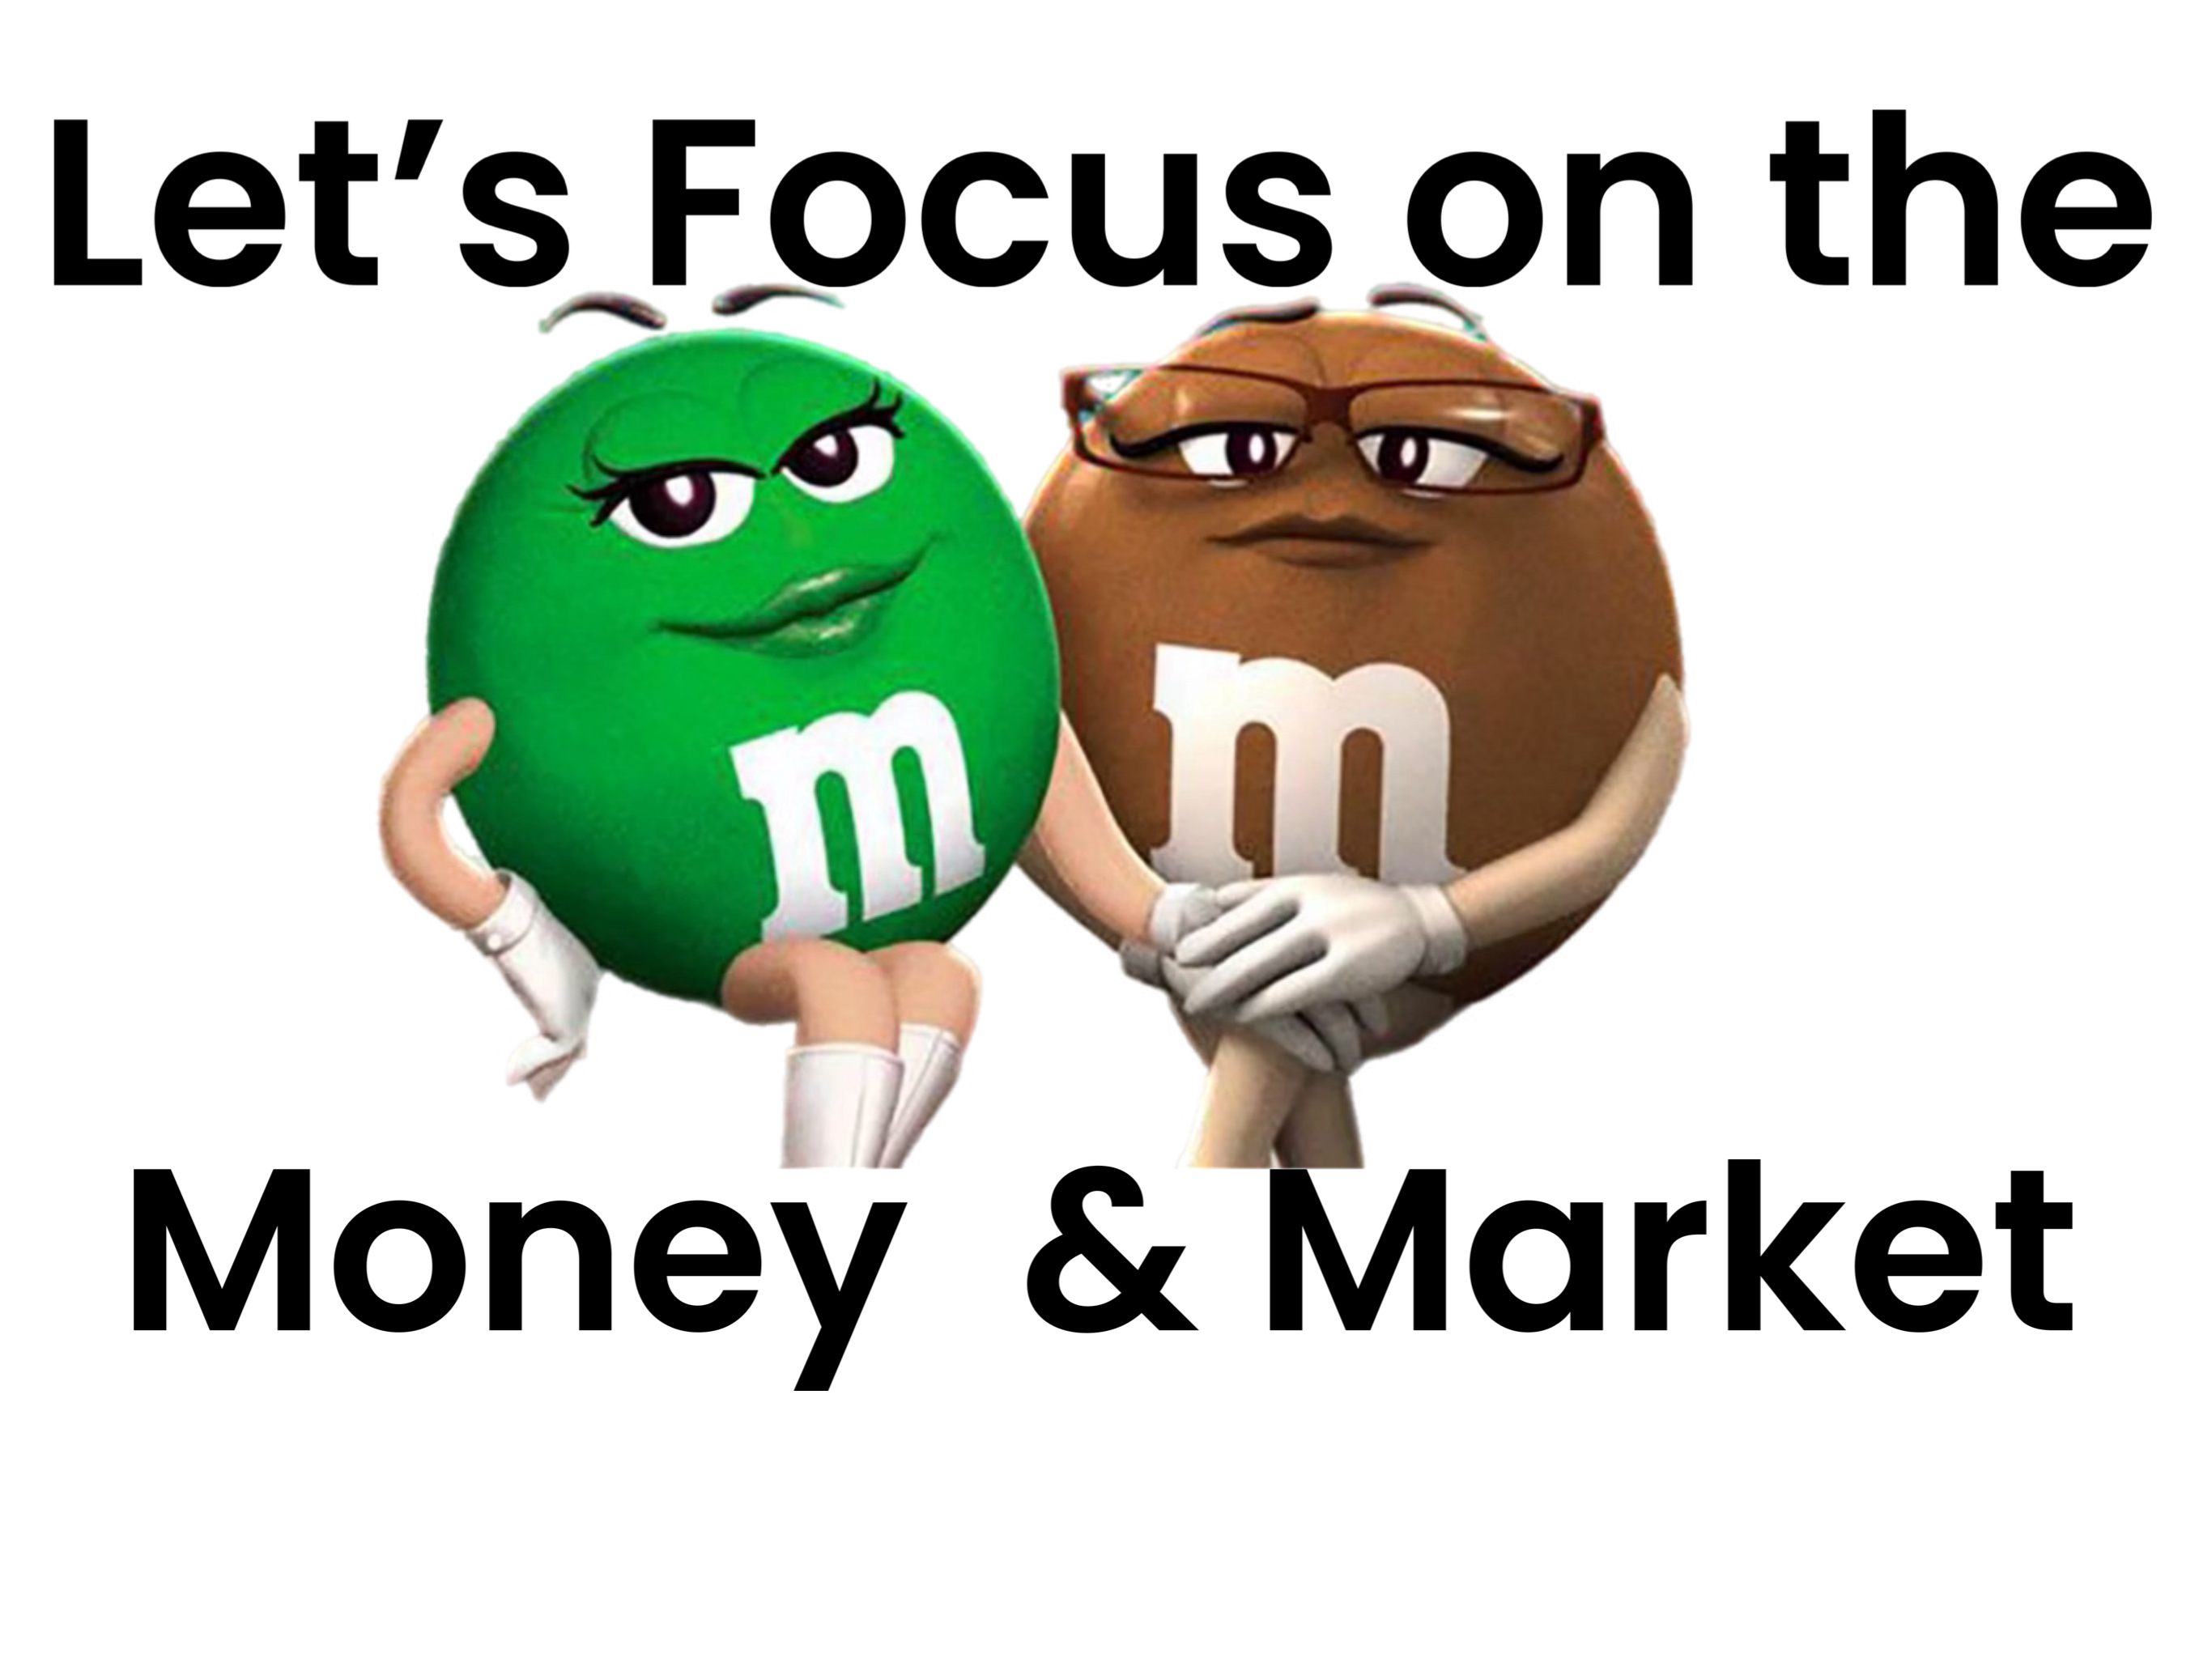

In [11]:
from IPython.display import Image
Image('IMG_1343.png')


In [10]:
#after checking of nulls and duplicates veiw the DataFrame again
cannabis_df

Month Ending                                       Product Type  \
0    January 2023                           Usable Cannabis (Flower)   
1    January 2023                                     Vape Cartridge   
2    January 2023                                     Infused Edible   
3    January 2023                             Extract for Inhalation   
4    January 2023                           Usable Cannabis (Flower)   
..            ...                                                ...   
112  January 2024                           Usable Cannabis (Flower)   
113  January 2024                                     Vape Cartridge   
114  January 2024                                     Infused Edible   
115  January 2024                             Extract for Inhalation   
116  January 2024  Other (Pill, Capsule, Non Smokable Infused Ext...   

     Retail Sales Amount     Market  
0             2819150.84  Adult-Use  
1              721223.06  Adult-Use  
2              688928.99  Adult-Use  
3              868829.67  Adult-Use  
4             4343508.44    Medical  
..                   ...        ...  
112           4554873.21    Medical  
113           2805798.45    Medical  
114            788811.51    Medical  
115            512652.16    Medical  
116            711193.90    Medical  

[117 rows x 4 columns]

In [12]:
#drop the Month ending and  Product Type beacuse the main focus is the retail sales to find out which market produce the most money
cannabis_df.drop(['Month Ending','Product Type'], axis=1, inplace=True)
cannabis_df

Retail Sales Amount     Market
0             2819150.84  Adult-Use
1              721223.06  Adult-Use
2              688928.99  Adult-Use
3              868829.67  Adult-Use
4             4343508.44    Medical
..                   ...        ...
112           4554873.21    Medical
113           2805798.45    Medical
114            788811.51    Medical
115            512652.16    Medical
116            711193.90    Medical

[117 rows x 2 columns]

In [13]:
#Used the groupby and means function inorder to calculate how much money was made from the purchase of Medical and Adult-Use cannabis in the year 2023
cannabis_calculation_df = cannabis_df.groupby('Market')['Retail Sales Amount'].mean()
cannabis_calculation_df

Market
Adult-Use    3.081462e+06
Medical      2.133082e+06
Name: Retail Sales Amount, dtype: float64

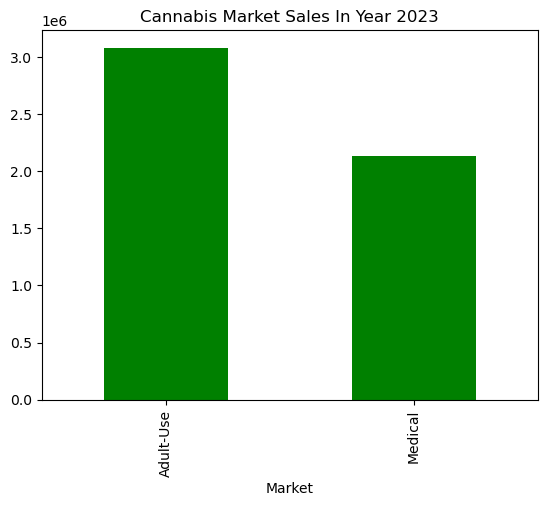

In [14]:
cannabis_calculation_df.plot(x='Market', y='Retail Sales Amount', kind='bar', color='green')
plt.title('Cannabis Market Sales In Year 2023')
plt.show()
